In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Working over data
dataset = pd.read_csv('downloads/GOOG.csv')
print(dataset)
trainset = dataset.iloc[:, 1:2].values
print("Train set")
print(trainset)
sc = MinMaxScaler(feature_range=(0,1))
trainset_scaled = sc.fit_transform(trainset)
print("Train set scaled")
print(trainset_scaled)

            Date         Open         High          Low        Close  \
0     2016-01-25   723.580017   729.679993   710.010010   711.669983   
1     2016-01-26   713.849976   718.280029   706.479980   713.039978   
2     2016-01-27   713.669983   718.234985   694.390015   699.989990   
3     2016-01-28   722.219971   733.690002   712.349976   730.960022   
4     2016-01-29   731.530029   744.989990   726.799988   742.950012   
...          ...          ...          ...          ...          ...   
1254  2021-01-15  1738.189941  1756.000000  1721.550049  1736.189941   
1255  2021-01-19  1752.250000  1809.275024  1741.459961  1790.859985   
1256  2021-01-20  1831.459961  1903.709961  1825.530029  1886.900024   
1257  2021-01-21  1898.000000  1934.859985  1887.109985  1891.250000   
1258  2021-01-22  1895.680054  1910.949951  1881.760010  1901.050049   

        Adj Close   Volume  
0      711.669983  1711700  
1      713.039978  1331700  
2      699.989990  2194200  
3      730.960022  

In [3]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(trainset_scaled[i-60: i, 0])
    y_train.append(trainset_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train
                               .shape[1], 1))
print(X_train)

[[[0.04530345]
  [0.03739381]
  [0.0372475 ]
  ...
  [0.07001585]
  [0.07528354]
  [0.08264035]]

 [[0.03739381]
  [0.0372475 ]
  [0.04419786]
  ...
  [0.07528354]
  [0.08264035]
  [0.07328376]]

 [[0.0372475 ]
  [0.04419786]
  [0.05176609]
  ...
  [0.08264035]
  [0.07328376]
  [0.07115395]]

 ...

 [[0.73607281]
  [0.75210345]
  [0.77894562]
  ...
  [0.87040601]
  [0.8826322 ]
  [0.87008897]]

 [[0.75210345]
  [0.77894562]
  [0.77808399]
  ...
  [0.8826322 ]
  [0.87008897]
  [0.88151852]]

 [[0.77894562]
  [0.77808399]
  [0.75423326]
  ...
  [0.87008897]
  [0.88151852]
  [0.945909  ]]]


In [7]:
from keras.models import  Sequential
from keras.layers import  Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
38/38 [==============================] - 8s 82ms/step - loss: 0.0509
Epoch 2/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0045
Epoch 4/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0043
Epoch 5/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0042
Epoch 6/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0033
Epoch 7/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0038
Epoch 9/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0033
Epoch 12/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0031
Epoch 13/100
38/38 [=====

In [21]:

#Testing the Work
dataset_test = pd.read_csv('downloads/GOOG.csv')
dataset_test = dataset_test.iloc[:, 1:2].values

# dataset_total = pd.concat([dataset, dataset_test], names=['Open'])
# inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60].values
inputs = dataset_test.reshape(-1, 1)
inputs = sc.transform(inputs)
# X_test = []
# for i in range (60, 80):
#     X_test.append(inputs[i:i, 0])

X_test = np.array(inputs)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test)

[[[0.04530345]]

 [[0.03739381]]

 [[0.0372475 ]]

 ...

 [[0.945909  ]]

 [[1.        ]]

 [[0.9981141 ]]]


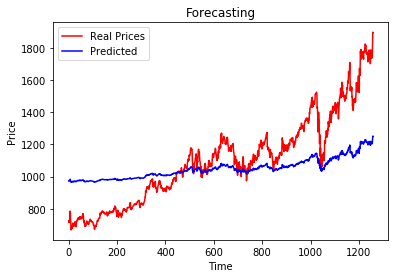

In [20]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Checking the results
plt.plot(dataset_test, color = 'red', label = 'Real Prices')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted')
plt.title('Forecasting')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()